In [ ]:
# ALL import statements
import pandas as pd

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

!pip install swifter
import swifter
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
from nltk.corpus import stopwords
porterStemmer = nltk.PorterStemmer()
nltk.download('average_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

import matplotlib.pyplot as plt
from numpy import real
from wordcloud import WordCloud
import statistics
from nltk import FreqDist
import seaborn as sns


import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from scipy.sparse import hstack
from scipy.sparse import csr_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading average_perceptron_tagger: Package
[nltk_data]     'average_perceptron_tagger' not found in index
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Esha

# load data
fake_news = pd.read_csv('Final_InputDataFAKE_Gianoglio_Lekshmy_More.csv')
real_news = pd.read_csv('Final_InputDataREAL_Gianoglio_Lekshmy_More.csv')

# add label columns to identify which article is fake or real
fake_news['label'] = 'fake'
real_news['label'] = 'real'

fake_news['label_num'] = 0
real_news['label_num'] = 1

# remove rows where 'text' is NaN
fake_news = fake_news[fake_news['text'].notna()]
real_news = real_news[real_news['text'].notna()]

# choose a random 10k sample from each data frame
fake_sample = fake_news.sample(n = 5000, random_state=42)
real_sample = real_news.sample(n = 5000, random_state=42)

# updating to use all 80k rows
#fake_sample = fake_news
#real_sample = real_news

In [ ]:
# Esha

# combine the two dataframes into 'news'
news = pd.concat([fake_sample, real_sample], ignore_index=True)

news.head(3)

,Unnamed: 0,text,label,label_num
0,22711,This past week saw one of the most colorful de...,fake,0
1,14334,How many? I think we ve lost count!,fake,0
2,14127,You can blame Obama for the hatred and divisio...,fake,0


In [ ]:
news.tail(3)

,Unnamed: 0,text,label,label_num
9997,26742,In a panel discussing the follies of governmen...,real,1
9998,16870,A senior Iranian military commander repeatedly...,real,1
9999,5845,Democratic U.S. senators tried to force a vote...,real,1


In [ ]:
# Federica

# Tokenize content in 'text' and create a new column 'tokens'
news['tokens'] = news['text'].swifter.apply(word_tokenize)

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
# Display last rows to check new 'tokens' column
news.head(3)

,Unnamed: 0,text,label,label_num,tokens
0,22711,This past week saw one of the most colorful de...,fake,0,"[This, past, week, saw, one, of, the, most, co..."
1,14334,How many? I think we ve lost count!,fake,0,"[How, many, ?, I, think, we, ve, lost, count, !]"
2,14127,You can blame Obama for the hatred and divisio...,fake,0,"[You, can, blame, Obama, for, the, hatred, and..."


In [ ]:
# Federica

# Keep only letters and convert them to lowercase
news['tokens'] = news['tokens'].apply(
    lambda token_list: [token.lower() for token in token_list if token.isalpha()]
)

news.head(3)

,Unnamed: 0,text,label,label_num,tokens
0,22711,This past week saw one of the most colorful de...,fake,0,"[this, past, week, saw, one, of, the, most, co..."
1,14334,How many? I think we ve lost count!,fake,0,"[how, many, i, think, we, ve, lost, count]"
2,14127,You can blame Obama for the hatred and divisio...,fake,0,"[you, can, blame, obama, for, the, hatred, and..."


In [ ]:
# Nanditha

# Displays the stop words in english
stopWords = stopwords.words('english')
stopWords[:8]

# Removes the stop words
news['tokens'] = news['tokens'].swifter.apply(
    lambda token_list: [token for token in token_list if token not in stopWords])

news.head()

# Apply stemming

news['tokens'] = news['tokens'].swifter.apply(
    lambda token_list: [porterStemmer.stem(token) for token in token_list]
)

news.head()




Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

,Unnamed: 0,text,label,label_num,tokens
0,22711,This past week saw one of the most colorful de...,fake,0,"[past, week, saw, one, color, debat, regard, c..."
1,14334,How many? I think we ve lost count!,fake,0,"[mani, think, lost, count]"
2,14127,You can blame Obama for the hatred and divisio...,fake,0,"[blame, obama, hatr, divis, see, video, year, ..."
3,44068,According to a report published by Russian Min...,fake,0,"[accord, report, publish, russian, ministri, d..."
4,41993,"A Turkish delegation, including Turkish Presid...",fake,0,"[turkish, deleg, includ, turkish, presid, erdo..."


In [ ]:
# Nanditha

# Extracts nouns using nltk library and tags
#wordsWithTags =  news['tokens'].apply(nltk.pos_tag)
#wordsWithTags[:8]
news['tokens'] = news['tokens'].swifter.apply(
    lambda token_list: [word for (word, tag) in nltk.pos_tag(token_list) if tag.startswith('N')]
)

news.head()

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

,Unnamed: 0,text,label,label_num,tokens
0,22711,This past week saw one of the most colorful de...,fake,0,"[week, color, debat, regard, media, trust, med..."
1,14334,How many? I think we ve lost count!,fake,0,"[mani, count]"
2,14127,You can blame Obama for the hatred and divisio...,fake,0,"[blame, divis, see, year, race, bait, pot, oba..."
3,44068,According to a report published by Russian Min...,fake,0,"[accord, report, ministri, defenc, presid, put..."
4,41993,"A Turkish delegation, including Turkish Presid...",fake,0,"[deleg, includ, presid, erdoğan, goal, busi, p..."


In [ ]:
# Federica
# Data Visualization: Show before-and-after visuals of the data cleaning process.

# Count words in each cell of the 'text' column (before data cleaning)
news['word_count'] = news['text'].swifter.apply(lambda x: len(str(x).split()))

# Count words in each cell of the 'tokens' column (after data cleaning)
news['token_count'] = news['tokens'].apply(len)

# Display table to show new columns
news.head(3)

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

,Unnamed: 0,text,label,label_num,tokens,word_count,token_count
0,22711,This past week saw one of the most colorful de...,fake,0,"[week, color, debat, regard, media, trust, med...",119,44
1,14334,How many? I think we ve lost count!,fake,0,"[mani, count]",8,2
2,14127,You can blame Obama for the hatred and divisio...,fake,0,"[blame, divis, see, year, race, bait, pot, oba...",34,9


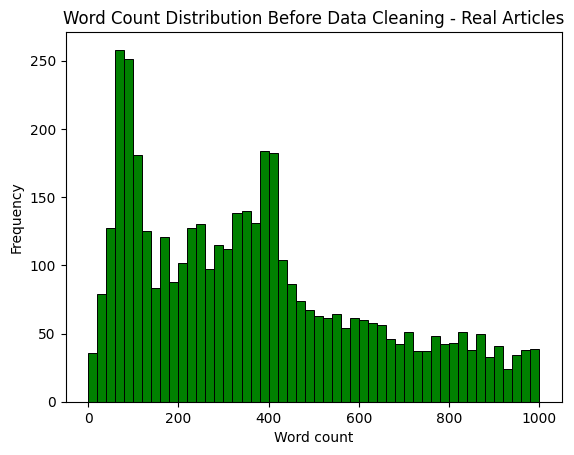

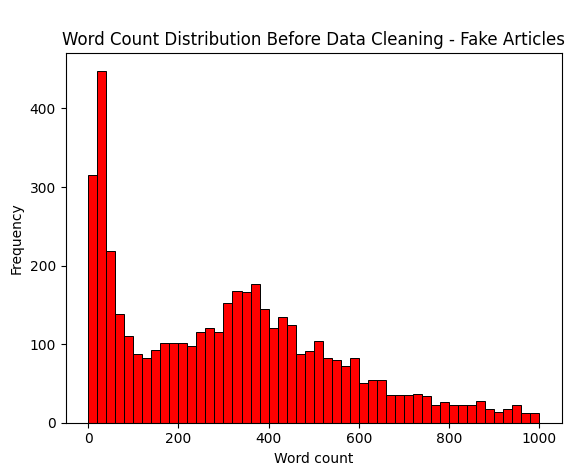

In [ ]:
# Federica

# Plot in a histogram word count before data cleaning for Real vs Fake Articles

# Real articles
news.loc[news['label'] == 'real', 'word_count'].plot(
    kind='hist', bins=50, range=(0, 1000),
    color='green', edgecolor='black', linewidth=0.7)
plt.title('Word Count Distribution Before Data Cleaning - Real Articles')
plt.xlabel('Word count')
plt.ylabel('Frequency')
plt.legend().remove()
plt.show()

# Fake articles
news.loc[news['label'] == 'fake', 'word_count'].plot(
    kind='hist', bins=50, range=(0, 1000),
    color='red', edgecolor='black', linewidth=0.7)
plt.title('\nWord Count Distribution Before Data Cleaning - Fake Articles')
plt.xlabel('Word count')
plt.ylabel('Frequency')
plt.legend().remove()
plt.show()

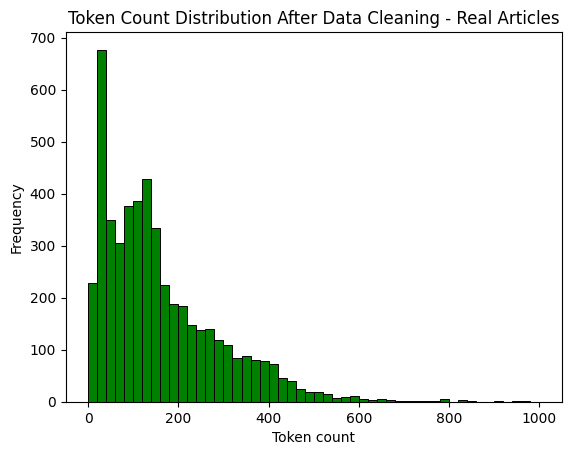

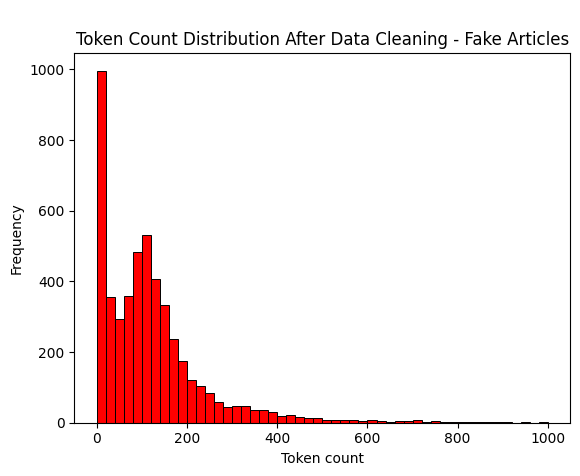

In [ ]:
# Federica

# Plot in a histogram token count after data cleaning for Real vs Fake Articles

# Real articles
news.loc[news['label'] == 'real', 'token_count'].plot(
    kind='hist', bins=50, range=(0, 1000),
    color='green', edgecolor='black', linewidth=0.7)
plt.title('Token Count Distribution After Data Cleaning - Real Articles')
plt.xlabel('Token count')
plt.ylabel('Frequency')
plt.legend().remove()
plt.show()
print()

# Fake articles
news.loc[news['label'] == 'fake', 'token_count'].plot(
    kind='hist', bins=50, range=(0, 1000),
    color='red', edgecolor='black', linewidth=0.7)
plt.title('\nToken Count Distribution After Data Cleaning - Fake Articles')
plt.xlabel('Token count')
plt.ylabel('Frequency')
plt.legend().remove()
plt.show()

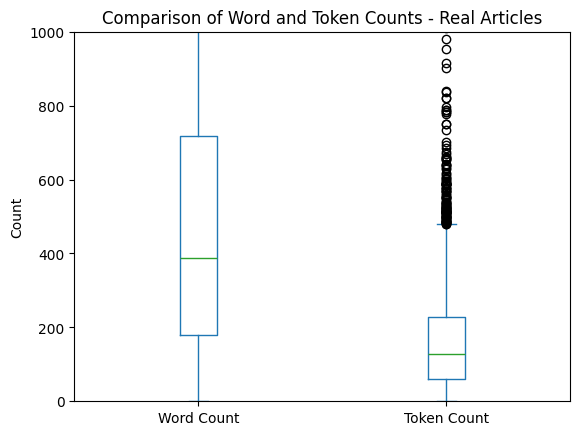

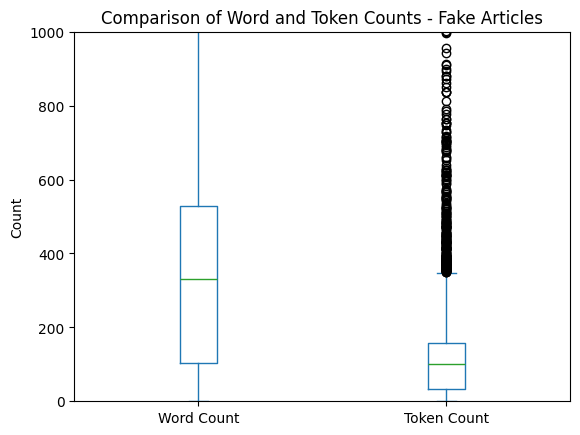

In [ ]:
# Federica
# Data Visualization: Before vs After Data Cleaning

# Create two boxplots to check the spread of Word and Token Counts

# Real articles
news.loc[news['label'] == 'real', ['word_count', 'token_count']].plot(kind='box')
plt.ylim(0, 1000)  # Set y-axis range, show only counts between 0 and 1000
plt.title('Comparison of Word and Token Counts - Real Articles')
plt.ylabel('Count')
plt.xticks([1, 2], ['Word Count', 'Token Count'])
plt.show()
print()

# Real articles
news.loc[news['label'] == 'fake', ['word_count', 'token_count']].plot(kind='box')
plt.ylim(0, 1000)  # Set y-axis range, show only counts between 0 and 1000
plt.title('Comparison of Word and Token Counts - Fake Articles')
plt.ylabel('Count')
plt.xticks([1, 2], ['Word Count', 'Token Count'])
plt.show()

In [ ]:
# Esha

# Calculate summary statistics for num of words (mean, median, mode, standard deviation)

# count number of words per article
# news['word_count'] = news.tokens.apply(lambda tokens: len(tokens))
# news['noun_count'] = news.token_nouns.apply(lambda nouns: len(nouns))

# finding average for both fake and real articles
fake_mean = round(float(news[news['label'] == 'fake'].word_count.sum() / len(news[news['label'] == 'fake'])), 2)
real_mean = round(float(news[news['label'] == 'real'].word_count.sum() / len(news[news['label'] == 'real'])), 2)

# printing average
print('Average Words Per Fake Article:', fake_mean)
print('Average Words Per Real Article:', real_mean)
print()

# finding median for both fake and real articles
fake_median = round(statistics.median(news[news['label'] == 'fake'].word_count))
real_median = round(statistics.median(news[news['label'] == 'real'].word_count))

# printing median
print('Median Word Count Per Fake Article:', fake_median)
print('Median Word Count Per Real Article:', real_median)
print()

# finding standard deviate for both fake and real articles
fake_sd = round(statistics.stdev(news[news['label'] == 'fake'].word_count),2)
real_sd = round(statistics.stdev(news[news['label'] == 'real'].word_count),2)

# printing standard deviation
print('Standard Deviation of Word Count Per Fake Article:', fake_sd)
print('Standard Deviation of Word Count Per Real Article:', real_sd)
print()

# finding mode for both fake and real articles
fake_mode = round(statistics.mode(news[news['label'] == 'fake'].word_count))
real_mode = round(statistics.mode(news[news['label'] == 'real'].word_count))

# printing mode
print('Mode of Word Count Per Fake Article:', fake_mode)
print('Mode of Word Count Per Real Article:', real_mode)
print()


Average Words Per Fake Article: 437.0
Average Words Per Real Article: 525.22

Median Word Count Per Fake Article: 332
Median Word Count Per Real Article: 387

Standard Deviation of Word Count Per Fake Article: 673.34
Standard Deviation of Word Count Per Real Article: 530.68

Mode of Word Count Per Fake Article: 25
Mode of Word Count Per Real Article: 77



In [ ]:
# Esha

# Explore and describe the distribution of numerical data using skewness and kurtosis.
# calculate skewness for word count of fake news
fake_skew = news[news.label == 'fake'].word_count.skew()

# calculate kurotiss for word count of fake news
fake_kurt = news[news.label == 'fake'].word_count.kurt()

# calculate skewness for word count of real news
real_skew = news[news.label == 'real'].word_count.skew()

# calculate kurotiss for word count of real news
real_kurt = news[news.label == 'real'].word_count.kurt()

print('Fake Skewness = ', round(fake_skew, 2))
print('Fake Kurtosis = ', round(fake_kurt, 2))

print('Real Skewness = ', round(real_skew, 2))
print('Real Kurtosis = ', round(real_kurt, 2))

Fake Skewness =  11.75
Fake Kurtosis =  258.05
Real Skewness =  3.72
Real Kurtosis =  28.33


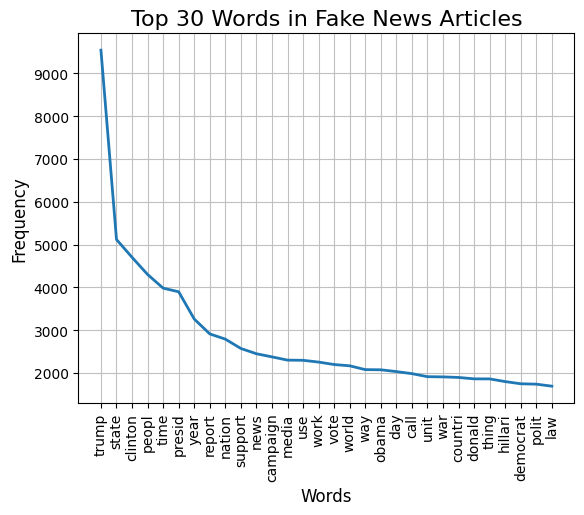

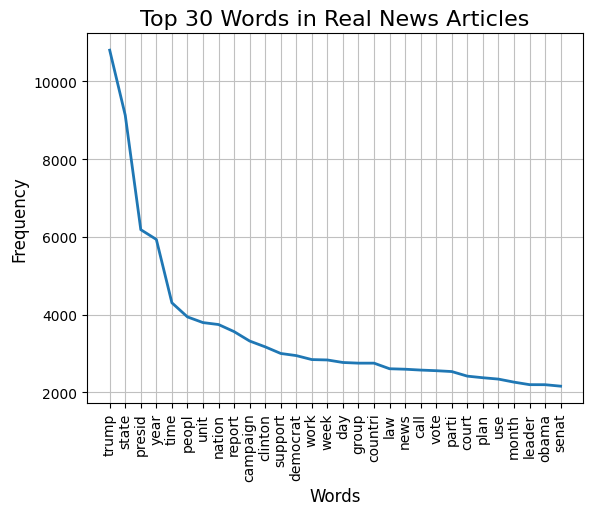

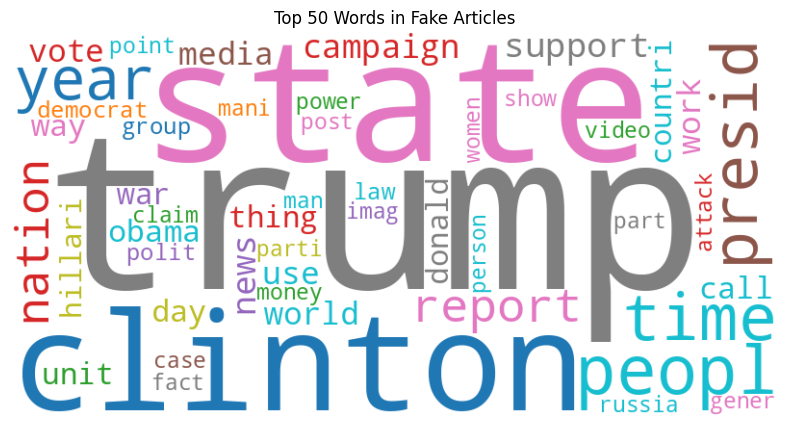

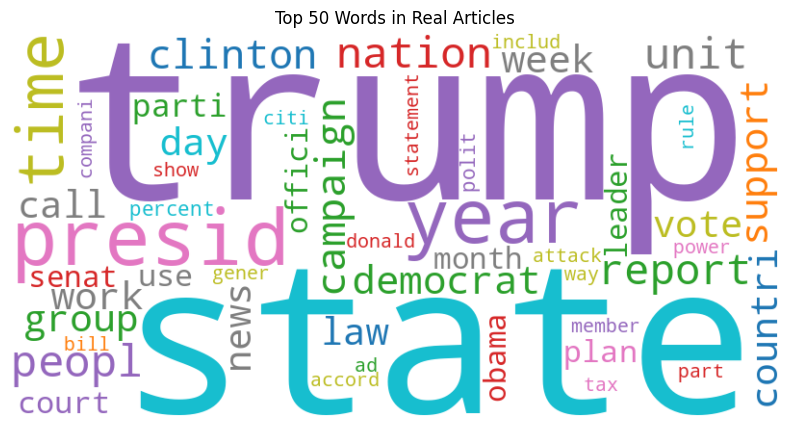

In [ ]:
# Esha

# Separate tokens based on fake and real
word_freq_fake = FreqDist()
word_freq_real = FreqDist()

# Iterate once through the DataFrame
for tokens, label in zip(news['tokens'], news['label']):
    if label == 'fake':
        word_freq_fake.update(tokens)
    else:
        word_freq_real.update(tokens)

# Generate frequency distribution for fake and real articles
word_freq_fake.plot(30)

# add title and labels
plt.title("Top 30 Words in Fake News Articles", fontsize=16)
plt.xlabel("Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

print()

# Generate frequency distribution for real articles
word_freq_real.plot(30)

# add title and labels
plt.title("Top 30 Words in Real News Articles", fontsize=16)
plt.xlabel("Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

print()

# top 50 words in fake articles
top50_words_fake = dict(word_freq_fake.most_common(50))

# Word cloud for most frequent words for fake articles
wordcloud_fake = WordCloud(width = 800,
                           height = 400,
                           background_color = 'white',
                           max_words=100,
                           relative_scaling=0.5,
                           colormap='tab10').generate_from_frequencies(top50_words_fake)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title("Top 50 Words in Fake Articles")
plt.show()

print()

# top 50 words in real articles
top50_words_real = dict(word_freq_real.most_common(50))

# Word cloud for most frequent words for real articles
wordcloud_real = WordCloud(width = 800,
                           height = 400,
                           background_color = 'white',
                           max_words=100,
                           relative_scaling=0.5,
                           colormap='tab10').generate_from_frequencies(top50_words_real)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title("Top 50 Words in Real Articles")
plt.show()

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Fake News Correlation Matrix:
              proper_nouns     verbs  adjectives   adverbs
proper_nouns      1.000000  0.855193    0.872304  0.805346
verbs             0.855193  1.000000    0.948107  0.971128
adjectives        0.872304  0.948107    1.000000  0.924083
adverbs           0.805346  0.971128    0.924083  1.000000

Real News Correlation Matrix:
              proper_nouns     verbs  adjectives   adverbs
proper_nouns      1.000000  0.852802    0.838435  0.776427
verbs             0.852802  1.000000    0.942430  0.945047
adjectives        0.838435  0.942430    1.000000  0.924571
adverbs           0.776427  0.945047    0.924571  1.000000


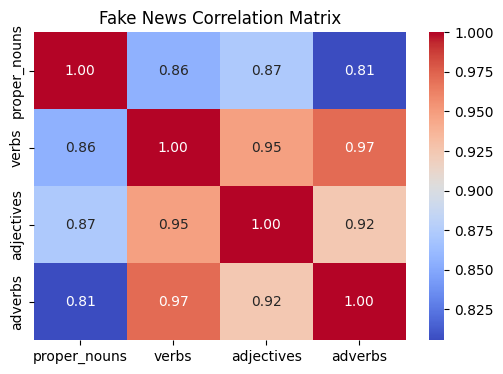

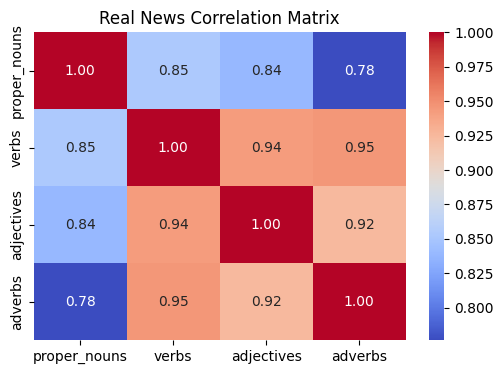


 Cross tabulation
label           fake   real
dominant_pos               
adjectives    0.0160  0.004
adverbs       0.0006  0.000
proper_nouns  0.3496  0.367
verbs         0.6338  0.629


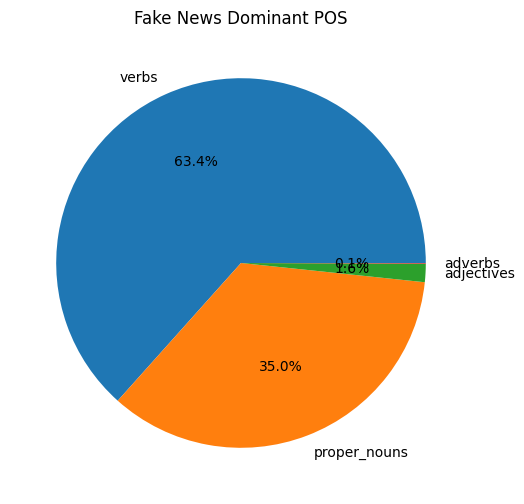

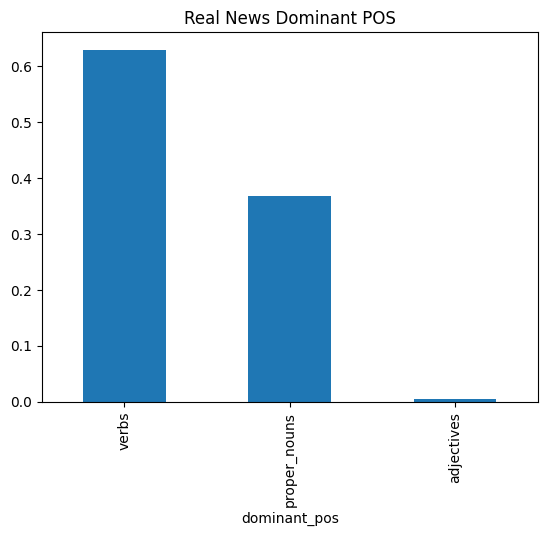

In [ ]:
# Nanditha

# Function to count the number of nouns, verbs, adjectives and adverbs
def pos_count(text):
  tags = nltk.pos_tag(nltk.word_tokenize(text))
  proper_nouns = sum(1 for word,tag in tags if tag in ['NNP','NNPS'])
  verbs = sum(1 for word,tag in tags if tag.startswith ('VB'))
  adjectives = sum(1 for word,tag in tags if tag.startswith ('JJ'))
  adverbs = sum(1 for word,tag in tags if tag.startswith ('RB'))
  return pd.Series([proper_nouns, verbs, adjectives, adverbs])

news[['proper_nouns','verbs','adjectives','adverbs']] = news['text'].swifter.apply(pos_count)
news.head()

# Creating a separate dataframe for fake and real news to use it in correlation analysis
fake_corr_df = news.loc[news['label'] == 'fake', ['proper_nouns','verbs','adjectives','adverbs']]
real_corr_df = news.loc[news['label'] == 'real', ['proper_nouns','verbs','adjectives','adverbs']]

# Correlation analysis between nouns, verbs, adjectives and adverbs
fake_corr_matrix = fake_corr_df[['proper_nouns','verbs','adjectives','adverbs']].corr()
real_corr_matrix = real_corr_df[['proper_nouns','verbs','adjectives','adverbs']].corr()

# Displays the correlation matrix of both groups
print("Fake News Correlation Matrix:")
print(fake_corr_matrix)
print("\nReal News Correlation Matrix:")
print(real_corr_matrix)


# Heatmap for the correlation matrix
plt.figure(figsize=(6,4))
sns.heatmap(fake_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Fake News Correlation Matrix")
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(real_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Real News Correlation Matrix")
plt.show()

# Cross tabulation to examine relationships
# Creates a categorical variable that contains the column label of the first occurence of the maximum value withing that row
news['dominant_pos'] = news[['proper_nouns','verbs','adjectives','adverbs']].idxmax(axis=1)
#news.head()
print('\n Cross tabulation')
cross_tab = pd.crosstab(news['dominant_pos'], news['label'], normalize='columns')
print(cross_tab)

# Data visualization

fake_dominant = news[news['label']=='fake']['dominant_pos'].value_counts(normalize=True)
real_dominant = news[news['label']=='real']['dominant_pos'].value_counts(normalize=True)

# Fake news pie chart$X
fake_dominant.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title="Fake News Dominant POS")
plt.ylabel("")
plt.show()
print()

# Real news pie chart
real_dominant.plot(kind='bar', title="Real News Dominant POS")
plt.ylabel("")
plt.show()



In [ ]:
# Federica
# Diagnostic Analysis

# Run sentiment analysis for every article

# Create a Vader analyzer
analyzer = SentimentIntensityAnalyzer()

# Count positive and negative word counts
def count_pos_neg(tokens):
    pos_count = 0
    neg_count = 0
    for word in tokens:
        if word in analyzer.lexicon:  # Check if the word exists in VADER lexicon
            score = analyzer.lexicon[word]
            if score > 0:
                pos_count += 1
            elif score < 0:
                neg_count += 1
    return pos_count, neg_count

# Apply the function to the 'tokens' column to count pos+neg words
news[['positive_words', 'negative_words']] = news['tokens'].apply(count_pos_neg).apply(pd.Series)

# Normalize counts for better comparison
news['positive_norm'] = (news['positive_words'] / news['token_count']).round(2)
news['negative_norm'] = (news['negative_words'] / news['token_count']).round(2)

# Determine polarity scores and return the compound score
def compoundScore(text):
   scores = analyzer.polarity_scores(text)
   compound = float(format(scores['compound'], '.2f'))
   return compound

# Apply the function to the 'tokens' column and save the compound score to a new column
news['polarity'] = news['tokens'].apply(lambda x: ' '.join(x)).apply(compoundScore)

news.head(3)

,Unnamed: 0,text,label,label_num,tokens,word_count,token_count,proper_nouns,verbs,adjectives,adverbs,dominant_pos,positive_words,negative_words,positive_norm,negative_norm,polarity
0,22711,This past week saw one of the most colorful de...,fake,0,"[week, color, debat, regard, media, trust, med...",119,44,34,17,11,4,proper_nouns,3,0,0.07,0.00,0.84
1,14334,How many? I think we ve lost count!,fake,0,"[mani, count]",8,2,0,3,1,0,verbs,0,0,0.00,0.00,0.00
2,14127,You can blame Obama for the hatred and divisio...,fake,0,"[blame, divis, see, year, race, bait, pot, oba...",34,9,2,4,2,0,verbs,0,1,0.00,0.11,-0.34


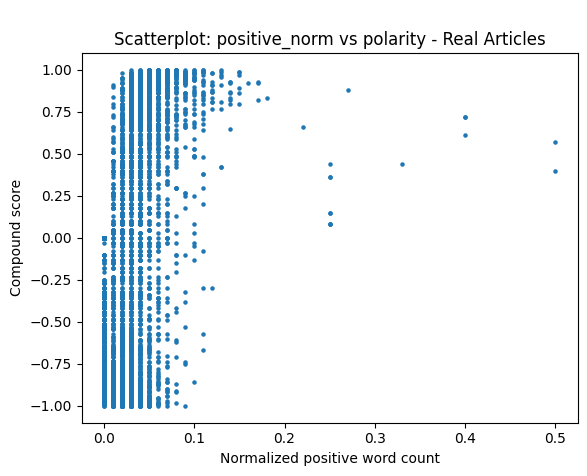


Simple Linear Regression (positive_norm) - Real Articles

Intercept: -0.452
Slope: 10.589
R-squared: 0.191


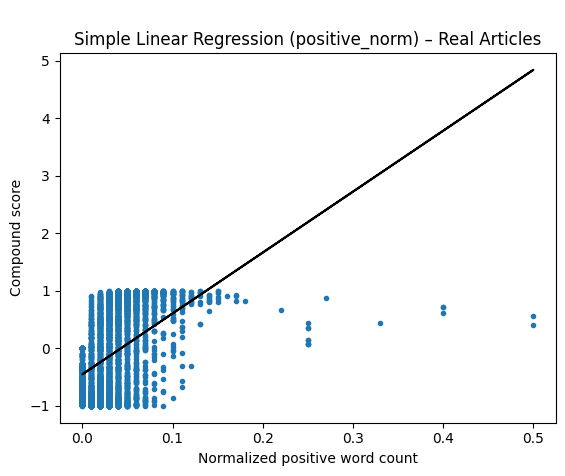

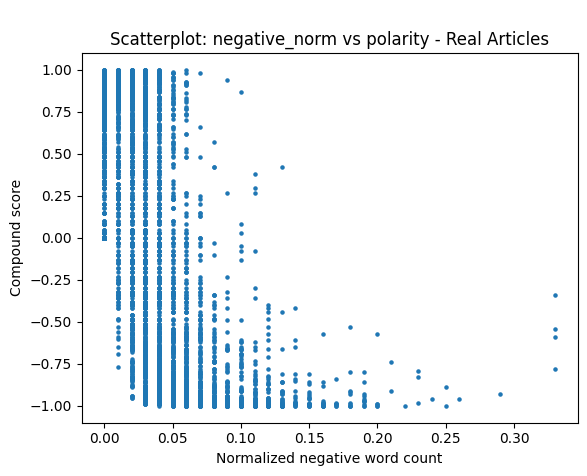


Simple Linear Regression (negative_norm) - Real Articles

Intercept: 0.381
Slope: -12.113
R-squared: 0.367


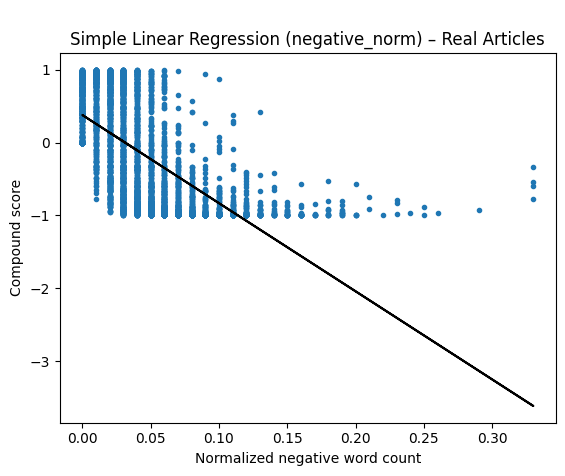


Multiple Linear Regression - Real Articles

Intercept: 0.05
Coefficients [b1, b2]: [  9.012 -11.252]
R-squared: 0.504


In [ ]:
# Federica
# Diagnostic Analysis

# Multiple Linear Regression: Y = compound score, X = normalized ratios of positive + negative word counts
# First, run Simple Linear Regression to check if there is a linear relationship between outcome and independent variables

### Real Articles
real_linear = news[news['label'] == 'real'].copy()
real_linear = real_linear.dropna(subset=['positive_norm', 'negative_norm', 'polarity'])

###
# Simple linear regression - positive_norm

real_linear.plot('positive_norm','polarity', kind='scatter', marker='.')
plt.title('\nScatterplot: positive_norm vs polarity - Real Articles')
plt.xlabel('Normalized positive word count')
plt.ylabel('Compound score')
plt.show()

model1_L = LinearRegression().fit(real_linear[['positive_norm']], real_linear['polarity'])

print("\nSimple Linear Regression (positive_norm) - Real Articles")
print("\nIntercept:", model1_L.intercept_.round(3))
print("Slope:", model1_L.coef_.round(3)[0])
print("R-squared:", round(model1_L.score(real_linear[['positive_norm']], real_linear['polarity']), 3))

plt.scatter(real_linear.positive_norm, real_linear.polarity, marker='.')
plt.plot(real_linear.positive_norm,
         model1_L.intercept_ + model1_L.coef_*real_linear.positive_norm,
         color='black')
plt.title('\nSimple Linear Regression (positive_norm) – Real Articles')
plt.xlabel('Normalized positive word count')
plt.ylabel('Compound score')
plt.show()

###
# Simple linear regression - negative_norm

real_linear.plot('negative_norm','polarity', kind='scatter', marker='.')
plt.title('\nScatterplot: negative_norm vs polarity - Real Articles')
plt.xlabel('Normalized negative word count')
plt.ylabel('Compound score')
plt.show()

model2_L = LinearRegression().fit(real_linear[['negative_norm']], real_linear['polarity'])

print("\nSimple Linear Regression (negative_norm) - Real Articles")
print("\nIntercept:", model2_L.intercept_.round(3))
print("Slope:", model2_L.coef_.round(3)[0])
print("R-squared:", round(model2_L.score(real_linear[['negative_norm']], real_linear['polarity']), 3))


plt.scatter(real_linear.negative_norm, real_linear.polarity, marker='.')
plt.plot(real_linear.negative_norm,
         model2_L.intercept_ + model2_L.coef_*real_linear.negative_norm,
         color='black')
plt.title('\nSimple Linear Regression (negative_norm) – Real Articles')
plt.xlabel('Normalized negative word count')
plt.ylabel('Compound score')
plt.show()

###
# Multiple Linear Regression

model3_L = LinearRegression().fit(real_linear[['positive_norm', 'negative_norm']], real_linear['polarity'])

print("\nMultiple Linear Regression - Real Articles")
print("\nIntercept:", model3_L.intercept_.round(3))
print("Coefficients [b1, b2]:", model3_L.coef_.round(3))
print("R-squared:", round(model3_L.score(real_linear[['positive_norm', 'negative_norm']], real_linear['polarity']), 3))



In [ ]:
# Federica
# Diagnostic Analysis

# Perform statistical testing to determine significant factors (p-values < 0.05)

### Real Articles

# Select predictors and add constant for intercept
X = sm.add_constant(real_linear[['positive_norm', 'negative_norm']])  # add the intercept term
y = real_linear['polarity']

# Fit model
model_sm_real = sm.OLS(y, X).fit()

# Display summary
print(model_sm_real.summary())


                            OLS Regression Results                            
Dep. Variable:               polarity   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     2536.
Date:                Wed, 03 Dec 2025   Prob (F-statistic):               0.00
Time:                        20:30:05   Log-Likelihood:                -3765.9
No. Observations:                4999   AIC:                             7538.
Df Residuals:                    4996   BIC:                             7557.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0502      0.014      3.586

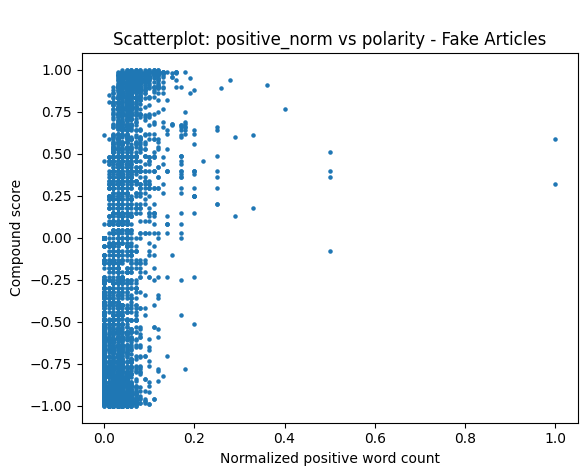


Simple Linear Regression (positive_norm) - Fake Articles

Intercept: -0.417
Slope: 5.547
R-squared: 0.123


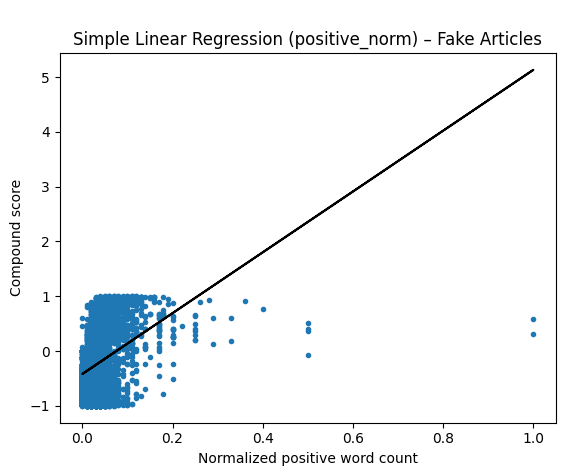

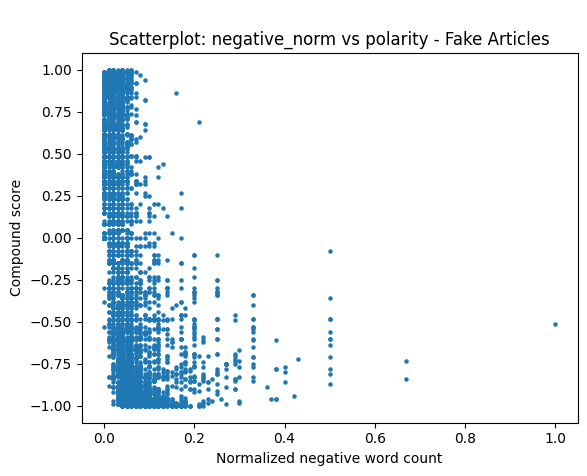


Simple Linear Regression (negative_norm) - Fake Articles

Intercept: 0.07
Slope: -5.143
R-squared: 0.219


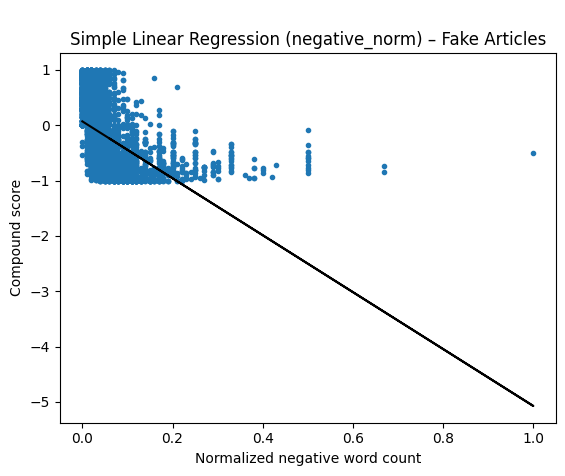


Multiple Linear Regression - Fake Articles

Intercept: -0.13
Coefficients [b1, b2]: [ 4.969 -4.858]
R-squared: 0.317


In [ ]:
# Federica
# Diagnostic Analysis

# Multiple Linear Regression: Y = compound score, X = normalized ratios of positive + negative word counts
# First, run Simple Linear Regression to check if there is a linear relationship between outcome and independent variables

### Fake Articles
fake_linear = news[news['label'] == 'fake'].copy()
fake_linear = fake_linear.dropna(subset=['positive_norm', 'negative_norm', 'polarity'])


###
# Simple linear regression - positive_norm

fake_linear.plot('positive_norm','polarity', kind='scatter', marker='.')
plt.title('\nScatterplot: positive_norm vs polarity - Fake Articles')
plt.xlabel('Normalized positive word count')
plt.ylabel('Compound score')
plt.show()

model4_L = LinearRegression().fit(fake_linear[['positive_norm']], fake_linear['polarity'])

print("\nSimple Linear Regression (positive_norm) - Fake Articles")
print("\nIntercept:", model4_L.intercept_.round(3))
print("Slope:", model4_L.coef_.round(3)[0])
print("R-squared:", round(model4_L.score(fake_linear[['positive_norm']], fake_linear['polarity']), 3))


plt.scatter(fake_linear.positive_norm, fake_linear.polarity, marker='.')
plt.plot(fake_linear.positive_norm,
         model4_L.intercept_ + model4_L.coef_*fake_linear.positive_norm,
         color='black')
plt.title('\nSimple Linear Regression (positive_norm) – Fake Articles')
plt.xlabel('Normalized positive word count')
plt.ylabel('Compound score')
plt.show()

###
# Simple linear regression - negative_norm

fake_linear.plot('negative_norm','polarity', kind='scatter', marker='.')
plt.title('\nScatterplot: negative_norm vs polarity - Fake Articles')
plt.xlabel('Normalized negative word count')
plt.ylabel('Compound score')
plt.show()

model5_L = LinearRegression().fit(fake_linear[['negative_norm']], fake_linear['polarity'])

print("\nSimple Linear Regression (negative_norm) - Fake Articles")
print("\nIntercept:", model5_L.intercept_.round(3))
print("Slope:", model5_L.coef_.round(3)[0])
print("R-squared:", round(model5_L.score(fake_linear[['negative_norm']], fake_linear['polarity']), 3))


plt.scatter(fake_linear.negative_norm, fake_linear.polarity, marker='.')
plt.plot(fake_linear.negative_norm,
         model5_L.intercept_ + model5_L.coef_*fake_linear.negative_norm,
         color='black')
plt.title('\nSimple Linear Regression (negative_norm) – Fake Articles')
plt.xlabel('Normalized negative word count')
plt.ylabel('Compound score')
plt.show()

###
# Multiple Linear Regression

model6_L = LinearRegression().fit(fake_linear[['positive_norm', 'negative_norm']], fake_linear['polarity'])

print("\nMultiple Linear Regression - Fake Articles")
print("\nIntercept:", model6_L.intercept_.round(3))
print("Coefficients [b1, b2]:", model6_L.coef_.round(3))
print("R-squared:", round(model6_L.score(fake_linear[['positive_norm', 'negative_norm']], fake_linear['polarity']), 3))


In [ ]:
# Federica
# Diagnostic Analysis

# Perform statistical testing to determine significant factors (p-values < 0.05)

### Fake Articles

# Select predictors and add constant for intercept
X = sm.add_constant(fake_linear[['positive_norm', 'negative_norm']])  # add the intercept term in ()
y = fake_linear['polarity']

# Fit model
model_sm_fake = sm.OLS(y, X).fit()

# Display summary
print(model_sm_fake.summary())

                            OLS Regression Results                            
Dep. Variable:               polarity   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     1159.
Date:                Wed, 03 Dec 2025   Prob (F-statistic):               0.00
Time:                        20:30:05   Log-Likelihood:                -4222.2
No. Observations:                4999   AIC:                             8450.
Df Residuals:                    4996   BIC:                             8470.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1300      0.013     -9.994

In [ ]:
# Federica
# Predictive Analysis

# Support Vector Machine SVM model

# First version: X = 'tokens'

print("First Model: X = 'tokens', y = 'label_num'\n")

# Vectorize text

# text column
texts = news['tokens'].apply(lambda x: ' '.join(x))


# Create the TF-IDF vectorizer
tfidf = TfidfVectorizer(
    max_features=50000,      # limit vocabulary (50k words)
    ngram_range=(1,2),       # use unigrams + bigrams
    min_df=5,                # ignore words that appear < 5 docs
)

# Fit the vectorizer and transform the text to TF-IDF matrix
X = tfidf.fit_transform(texts)

# Set up the target variable
y = news['label_num']

print("Shape of the TF-IDF matrix: (n_articles, n_features)")
print(X.shape) # output matrix X for the SVM model (articlex x word features)
print()

# Run the model multiple times, changing the regularization parameter 'C'
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=33, test_size=0.2)

from sklearn.svm import SVC
print("SVM Model C=1")
model0 = SVC() # C=1 by default
model0.fit(X_train1, y_train1)
print(round(model0.score(X_test1, y_test1), 2))

# Display the Classification Report
print("\nClassification Report")
print()
from sklearn.metrics import classification_report
y_pred1 = model0.predict(X_test1)
print(classification_report(y_test1, y_pred1))

print('\n\nAdjusting the regularization parameter C\n')

print("\nSVM Model C=0.1")
model_reg1 = SVC (C=0.1)
model_reg1.fit(X_train1, y_train1)
print(round(model_reg1.score(X_test1, y_test1), 2))

print("\nSVM Model C=100")
model_reg2 = SVC (C=100)
model_reg2.fit(X_train1, y_train1)
print(round(model_reg2.score(X_test1, y_test1), 2))


print("\nSVM Model C=1000")
model_reg3 = SVC (C=1000)
model_reg3.fit(X_train1, y_train1)
print(round(model_reg3.score(X_test1, y_test1), 2))
print()
print()

First Model: X = 'tokens', y = 'label_num'

Shape of the TF-IDF matrix: (n_articles, n_features)
(10000, 42998)

SVM Model C=1
0.89

Classification Report

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1001
           1       0.89      0.89      0.89       999

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



Adjusting the regularization parameter C


SVM Model C=0.1
0.81

SVM Model C=100
0.9

SVM Model C=1000
0.9




In [ ]:
# Federica
# Predictive Analysis
# Support Vector Machine SVM model

# Second version: X = tokens + word_count, proper_nouns, polarity

print("Second Model: X = 'tokens' (TF-IDF) + 'word_count', 'proper_nouns', 'polarity', y = 'label_num'\n")



# Vectorize text
texts = news['tokens'].apply(lambda x: ' '.join(x))

# Create the TF-IDF vectorizer
tfidf = TfidfVectorizer(
    max_features=50000,      # limit vocabulary (50k words)
    ngram_range=(1,2),       # use unigrams + bigrams
    min_df=5,                # ignore words that appear < 5 docs
)

# Fit the vectorizer and transform the text to TF-IDF matrix
X_text = tfidf.fit_transform(texts)

# Select additional numeric features
X_numeric = news[['word_count', 'proper_nouns', 'polarity']].values  # convert to numpy array

# Combine TF-IDF features with numeric features
X_combined = hstack([X_text, X_numeric])

# Set up the target variable
y = news['label_num']

print("Shape of the TF-IDF matrix: (n_articles, n_features)")
print(X_combined.shape) # output matrix X for the SVM model (articlex x word features)
print()

# Run the model multiple times, changing the regularization parameter 'C'

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_combined, y, random_state=33, test_size=0.2)


print("SVM Model C=1")
model4 = SVC() # C=1 by default
model4.fit(X_train2, y_train2)
print(round(model4.score(X_test2, y_test2),2))

# Display the Classification Report
print("\nClassification Report")
print()

y_pred2 = model4.predict(X_test2)
print(classification_report(y_test2, y_pred2))

print('\n\nAdjusting the regularization parameter C\n')

print("\nSVM Model C=0.1")
model_reg5 = SVC (C=0.1)
model_reg5.fit(X_train2, y_train2)
print(round(model_reg5.score(X_test2, y_test2), 2))

print("\nSVM Model C=100")
model_reg6 = SVC (C=100)
model_reg6.fit(X_train2, y_train2)
print(round(model_reg6.score(X_test2, y_test2), 2))

print("\nSVM Model C=1000")
model_reg7 = SVC (C=1000)
model_reg7.fit(X_train2, y_train2)
print(round(model_reg7.score(X_test2, y_test2), 2))
print()
print()

Second Model: X = 'tokens' (TF-IDF) + 'word_count', 'proper_nouns', 'polarity', y = 'label_num'

Shape of the TF-IDF matrix: (n_articles, n_features)
(10000, 43001)

SVM Model C=1
0.56

Classification Report

              precision    recall  f1-score   support

           0       0.54      0.80      0.65      1001
           1       0.62      0.32      0.42       999

    accuracy                           0.56      2000
   macro avg       0.58      0.56      0.53      2000
weighted avg       0.58      0.56      0.53      2000



Adjusting the regularization parameter C


SVM Model C=0.1
0.55

SVM Model C=100
0.61

SVM Model C=1000
0.62





Classification Report               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1000
           1       0.84      0.86      0.85      1000

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000


F1 score:  0.85

Recall Score:  0.85

Score of the model using the training data:  0.86

Score of the model using the testing data:  0.85

Accuracy:  0.85

Confusion Matrix:
 [[833 167]
 [141 859]]



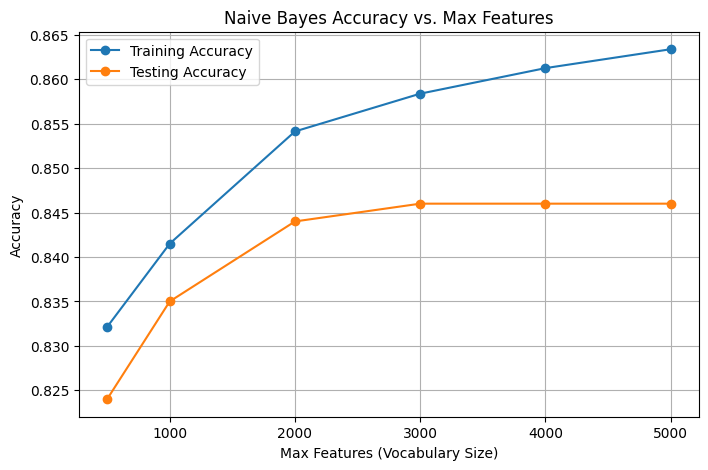

In [ ]:
# Nanditha
# Naive bayes algorithm using text and label

# Splits the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(news.text, news.label_num, test_size=0.2, stratify=news.label_num,random_state=42)

# Converts text into numerical features and applying a classification model
clf = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english',  max_features=5000)),
    ('nb', MultinomialNB())
])

# Trains the model using the training data
clf.fit(X_train, y_train)

# Makes predictions on the test data
y_pred = clf.predict(X_test)

# Evaluates the model performance
score_training_data = clf.score(X_train, y_train)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
score_testing_data = clf.score(X_test, y_test)

print('\nClassification Report',classification_report(y_test, y_pred))
print("\nF1 score: ", round(f1,2))
print("\nRecall Score: ", round(recall,2))
print("\nScore of the model using the training data: ",round(score_training_data,2))
print("\nScore of the model using the testing data: ",round(score_testing_data,2))
print("\nAccuracy: ", round(accuracy_score(y_test, y_pred),2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print()

feature_sizes = [500, 1000, 2000, 3000, 4000, 5000]
train_acc = []
test_acc = []

for size in feature_sizes:
    temp_clf = Pipeline([
        ('vectorizer', CountVectorizer(stop_words='english', max_features=size)),
        ('nb', MultinomialNB())
    ])

    temp_clf.fit(X_train, y_train)

    # Accuracy calculations
    train_pred = temp_clf.predict(X_train)
    test_pred = temp_clf.predict(X_test)

    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(feature_sizes, train_acc, marker='o', label='Training Accuracy')
plt.plot(feature_sizes, test_acc, marker='o', label='Testing Accuracy')
plt.title("Naive Bayes Accuracy vs. Max Features")
plt.xlabel("Max Features (Vocabulary Size)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Using multiple features in naive bayes

# Prepare features: text + numerics
X_num = news[['text','word_count', 'proper_nouns','polarity']]
y = news['label_num']

# Splits the data into training and testing
X_train_text, X_test_text, y_train, y_test = train_test_split(
     X_num, y, test_size=0.2, stratify=y, random_state=42
)

# Handles numerical and categorical data
# A single pipeline which transforms data before transferring it to the classifier
preprocessor = ColumnTransformer([
    ('text', CountVectorizer(stop_words='english', max_features=5000), 'text'),  # Text branch
    ('num',MinMaxScaler(), ['word_count', 'proper_nouns','polarity'])  # Numeric branch
])

# # Applies columns transformer and runs the classifier
clf = Pipeline([
    ('preprocessor', preprocessor),
    ('nb', MultinomialNB())
])

clf.fit(X_train_text, y_train)

# Makes predictions on the test data
y_pred = clf.predict(X_test_text)

# Evaluates the model performance
score_training_data = clf.score(X_train_text, y_train)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
score_testing_data = clf.score(X_test_text, y_test)

print('\nClassification Report',classification_report(y_test, y_pred))
print("\nF1 score: ", round(f1,2))
print("\nRecall Score: ", round(recall,2))
print("\nScore of the model using the training data: ",round(score_training_data,2))
print("\nScore of the model using the testing data: ",round(score_testing_data,2))
print("\nAccuracy: ", round(accuracy_score(y_test, y_pred),2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print()

feature_sizes = [500, 1000, 2000, 3000, 4000, 5000]
train_acc = []
test_acc = []

for size in feature_sizes:
    temp_clf = Pipeline([
        ('vectorizer', CountVectorizer(stop_words='english', max_features=size)),
        ('nb', MultinomialNB())
    ])

    temp_clf.fit(X_train, y_train)

    # Accuracy calculations
    train_pred = temp_clf.predict(X_train)
    test_pred = temp_clf.predict(X_test)

    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(feature_sizes, train_acc, marker='o', label='Training Accuracy')
plt.plot(feature_sizes, test_acc, marker='o', label='Testing Accuracy')
plt.title("Naive Bayes Accuracy vs. Max Features")
plt.xlabel("Max Features (Vocabulary Size)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()


Classification Report               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       0.84      0.86      0.85      1000

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000


F1 score:  0.85

Recall Score:  0.85

Score of the model using the training data:  0.86

Score of the model using the testing data:  0.85

Accuracy:  0.85

Confusion Matrix:
 [[836 164]
 [141 859]]


In [ ]:
# Esha

# logistic regression with text and label num

# train and test split in data
lr_train_x, lr_test_x, lr_train_y, lr_test_y = train_test_split(
    news['tokens'],
    news['label_num'],
    test_size=0.2,
    random_state=42
)

# vectorizing text variable
vectorizer = TfidfVectorizer(max_features=20000)

lr_train_x_final = vectorizer.fit_transform(
    lr_train_x.apply(lambda x: ' '.join(x))
)

lr_test_x_final = vectorizer.transform(
    lr_test_x.apply(lambda x: ' '.join(x))
)

# fitting the model
model_lr = LogisticRegression(max_iter=1000, solver='saga')
model_lr.fit(lr_train_x_final, lr_train_y)

# predicting and generating report
lr_y_pred = model_lr.predict(lr_test_x_final)
print(classification_report(lr_test_y, lr_y_pred))



# setting c to 0.1 for less control
model_lr_reg0 = LogisticRegression(C = 0.1, max_iter=1000, solver='saga')
model_lr_reg0.fit(lr_train_x_final, lr_train_y)

# predicting and generating report
lr_y_pred = model_lr_reg0.predict(lr_test_x_final)
print(classification_report(lr_test_y, lr_y_pred))



# updating c to 100 for more control
model_lr_reg1 = LogisticRegression(C = 0.5, max_iter=1000, solver='saga')
model_lr_reg1.fit(lr_train_x_final, lr_train_y)

# predicting and generating report
lr_y_pred = model_lr_reg1.predict(lr_test_x_final)
print(classification_report(lr_test_y, lr_y_pred))


              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1012
           1       0.88      0.88      0.88       988

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1012
           1       0.84      0.82      0.83       988

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1012
           1       0.87      0.87      0.87       988

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



In [ ]:
# Esha
# logistic regression with multiple variables and label num

# train and test split in data
lr_train_x2, lr_test_x2, lr_train_y2, lr_test_y2 = train_test_split(
    news[['tokens', 'word_count', 'proper_nouns', 'polarity']],
    news['label_num'],
    test_size=0.2,
    random_state=42
)

# vectorizing text variable
vectorizer = TfidfVectorizer(max_features=20000)

lr_X_train_text2 = vectorizer.fit_transform(
    lr_train_x2['tokens'].apply(lambda x: ' '.join(x))
)

lr_X_test_text2 = vectorizer.transform(
    lr_test_x2['tokens'].apply(lambda x: ' '.join(x))
)

# selecting numeric variables
lr_X_train_num = csr_matrix(lr_train_x2[['word_count', 'proper_nouns', 'polarity']].values)
lr_X_test_num  = csr_matrix(lr_test_x2[['word_count', 'proper_nouns', 'polarity']].values)

# combining num and text
lr_X_train_final2 = hstack([lr_X_train_num, lr_X_train_text2])
lr_X_test_final2  = hstack([lr_X_test_num, lr_X_test_text2])

# fitting the model
model_lr = LogisticRegression(max_iter=2000, solver='liblinear')
model_lr.fit(lr_X_train_final2, lr_train_y2)

# predicting and generating report
lr_y_pred2 = model_lr.predict(lr_X_test_final2)
print(classification_report(lr_test_y2, lr_y_pred2))



# setting c to 0.1 for control
model_lr_reg0 = LogisticRegression(C = 0.1, max_iter=2000, solver='liblinear')
model_lr_reg0.fit(lr_X_train_final2, lr_train_y2)

# predicting and generating report
lr_y_pred2 = model_lr_reg0.predict(lr_X_test_final2)
print(classification_report(lr_test_y2, lr_y_pred2))



# updating c to 0.5 for control
model_lr_reg1 = LogisticRegression(C = 0.5, max_iter=2000, solver='liblinear')
model_lr_reg1.fit(lr_X_train_final2, lr_train_y2)

# predicting and generating report
lr_y_pred2 = model_lr_reg1.predict(lr_X_test_final2)
print(classification_report(lr_test_y2, lr_y_pred2))



              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1012
           1       0.88      0.88      0.88       988

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1012
           1       0.84      0.82      0.83       988

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1012
           1       0.87      0.87      0.87       988

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000

